In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from simulation_framework.bernoulli_trial import BernoulliTrial
from simulation_framework.simulation_framework import run_sim
from simulation_framework.plot_functions import format_results, \
                                                summarize_results, \
                                                plot_accuracy, \
                                                plot_performance, \
                                                plot_cumulative_reward, \
                                                plot_expected_reward, \
                                                create_arm_results
from algorithms.epsilon_greedy import EpsilonGreedy
from algorithms.epsilon_greedy_annealing import EpsilonGreedyAnnealing
from algorithms.hedge import Hedge
from algorithms.softmax import Softmax
from algorithms.softmax_annealing import SoftmaxAnnealing
from algorithms.ucb1 import UCB1
from algorithms.ucb2 import UCB2
from algorithms.exp3 import EXP3
from algorithms.thompson_sampling import ThompsonSampling
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
probabilities = [.1, .1, .1, .1, .9]

In [3]:
n_arms = len(probabilities)
random.shuffle(probabilities)
while probabilities[0] == max(probabilities):
    random.shuffle(probabilities)
arms = [BernoulliTrial(mu) for mu in probabilities]
print('Best arm is {}'.format(np.argmax(probabilities)))

Best arm is 4


In [4]:
horizon = 250
number_of_simulations = 5000

## Epsilon Greedy

In [5]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for epsilon in [.1, .2, .3, .4, .5]:
    algorithm = EpsilonGreedy(epsilon, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['epsilon'] = epsilon
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['epsilon'])

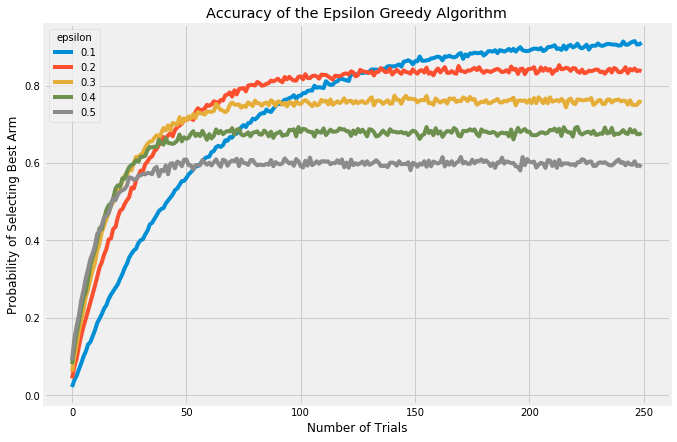

In [6]:
plot_accuracy(df_ave, probabilities, 'Epsilon Greedy', 'epsilon')

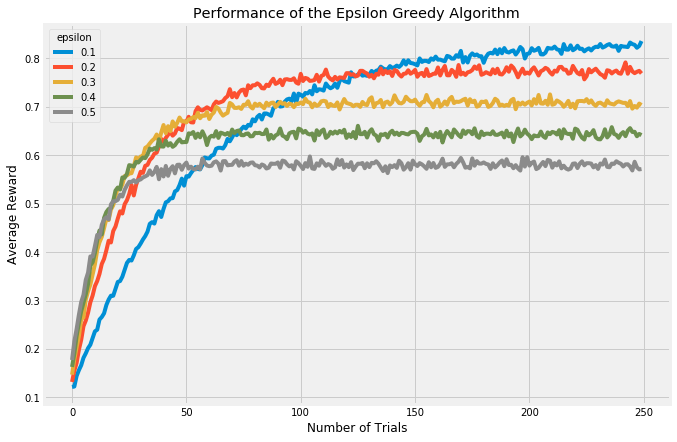

In [7]:
plot_performance(df_ave, 'Epsilon Greedy', 'epsilon')

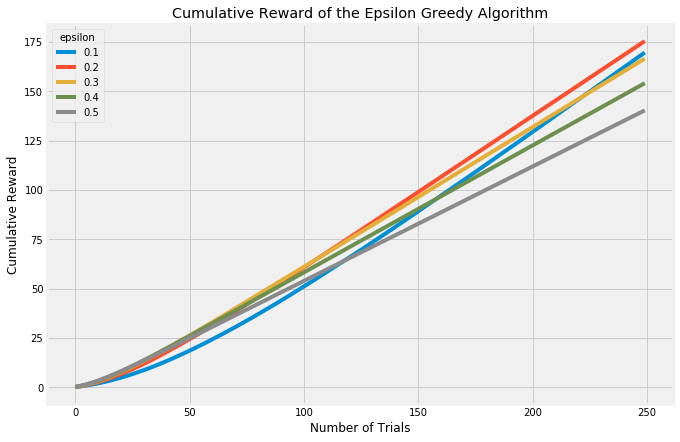

In [8]:
plot_cumulative_reward(df_ave, 'Epsilon Greedy', 'epsilon')

## Annealed Epsilon Greedy

In [9]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for annealing_factor in [.000000000000001, .0000001, 10, 100000, 10000000000]:
    algorithm = EpsilonGreedyAnnealing(n_arms, annealing_factor)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['annealing_factor'] = annealing_factor
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['annealing_factor'])

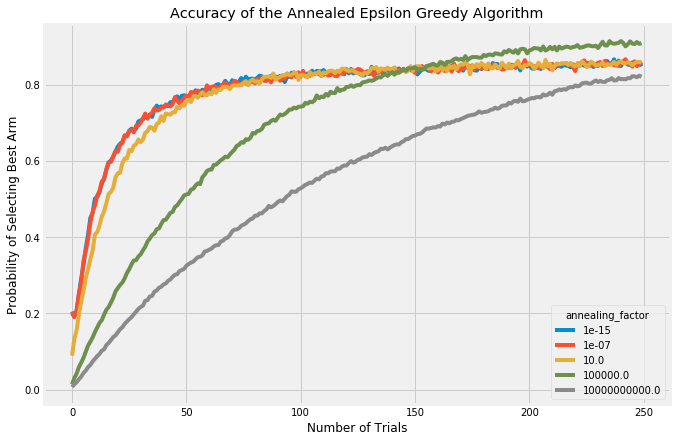

In [10]:
plot_accuracy(df_ave, probabilities, 'Annealed Epsilon Greedy', 'annealing_factor')

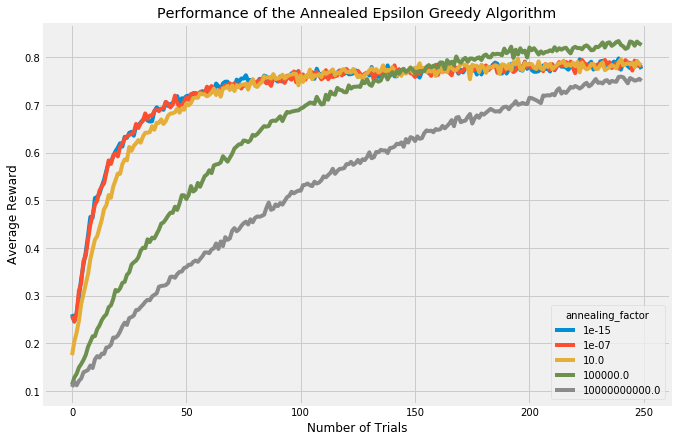

In [11]:
plot_performance(df_ave, 'Annealed Epsilon Greedy', 'annealing_factor')

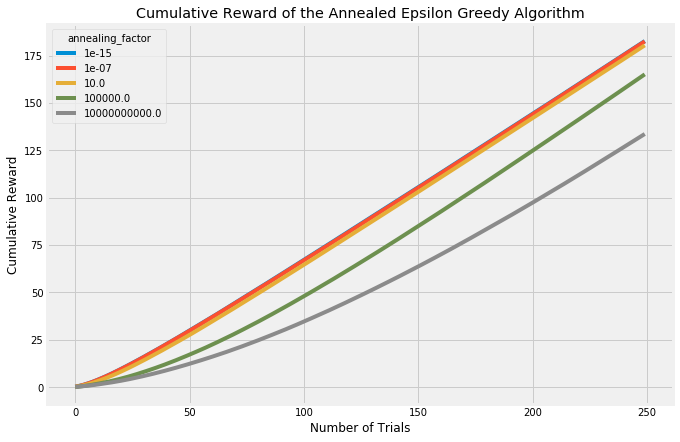

In [12]:
plot_cumulative_reward(df_ave, 'Annealed Epsilon Greedy', 'annealing_factor')

## Hedge

In [13]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for temperature in [.1, .2, .3, .4, .5]:
    algorithm = Hedge(temperature, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['temperature'] = temperature
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['temperature'])

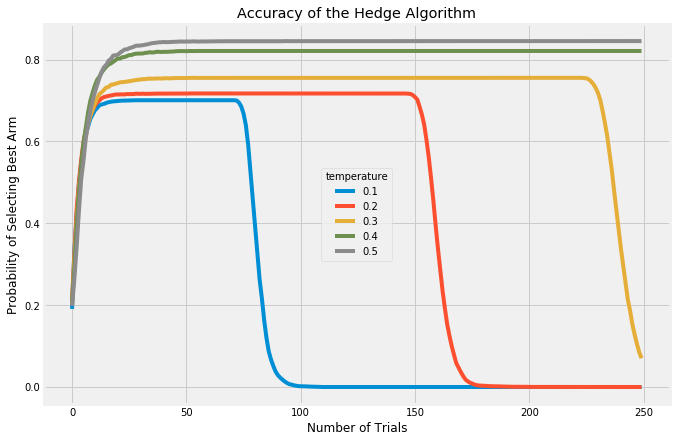

In [14]:
plot_accuracy(df_ave, probabilities, 'Hedge', 'temperature')

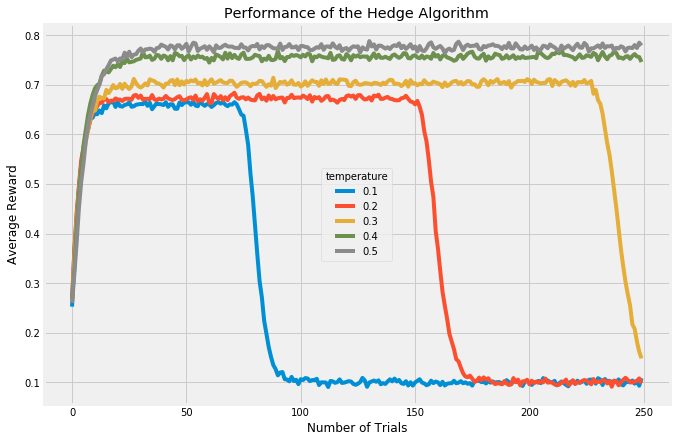

In [15]:
plot_performance(df_ave, 'Hedge', 'temperature')

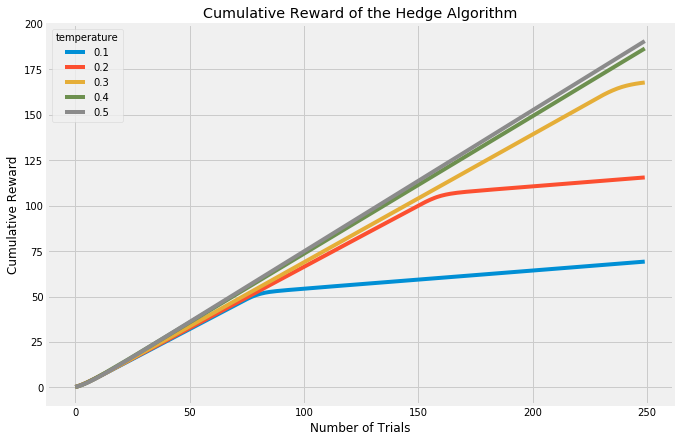

In [16]:
plot_cumulative_reward(df_ave, 'Hedge', 'temperature')

## Softmax

In [17]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for temperature in [.1, .2, .3, .4, .5]:
    algorithm = Softmax(temperature, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['temperature'] = temperature
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['temperature'])

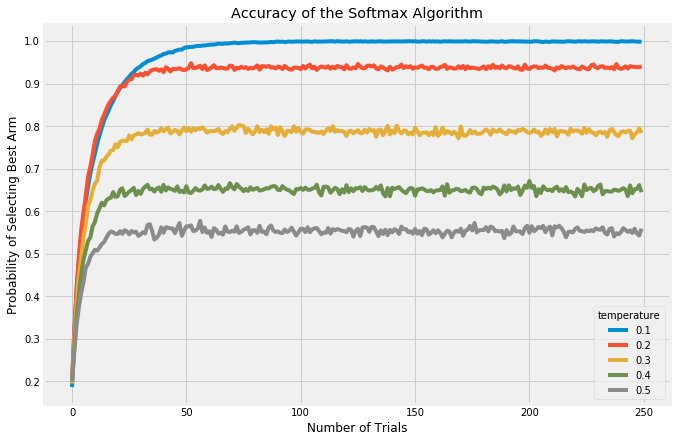

In [18]:
plot_accuracy(df_ave, probabilities, 'Softmax', 'temperature')

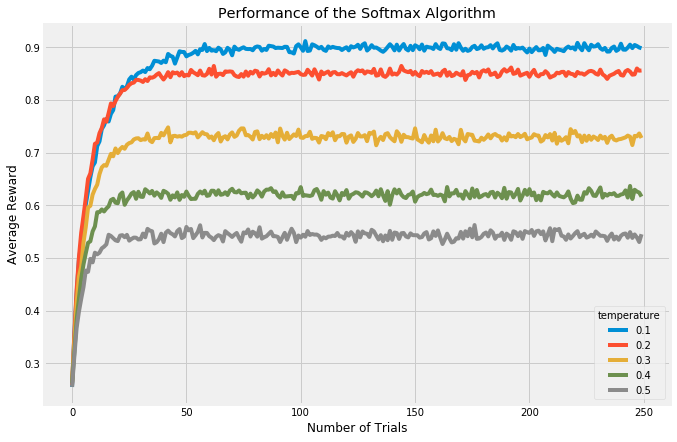

In [19]:
plot_performance(df_ave, 'Softmax', 'temperature')

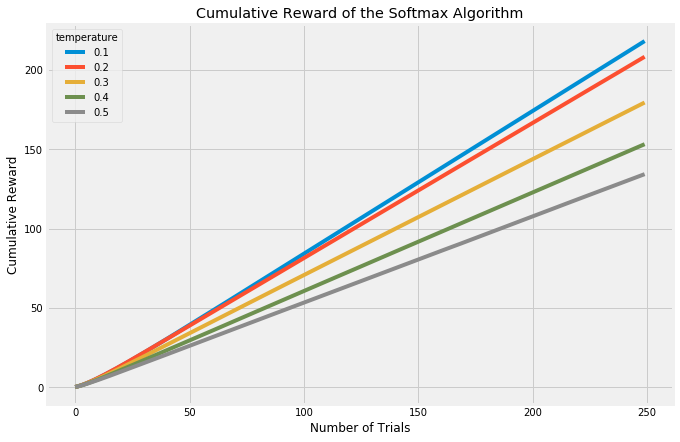

In [20]:
plot_cumulative_reward(df_ave, 'Softmax', 'temperature')

## Annealed Softmax

In [21]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for annealing_factor in [.000000000000001, .0000001, 10, 100000, 10000000000]:
    algorithm = SoftmaxAnnealing(n_arms, annealing_factor)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['annealing_factor'] = annealing_factor
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['annealing_factor'])

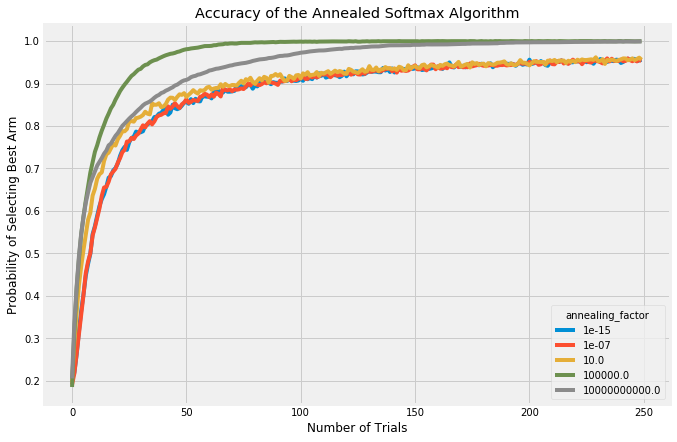

In [22]:
plot_accuracy(df_ave, probabilities, 'Annealed Softmax', 'annealing_factor')

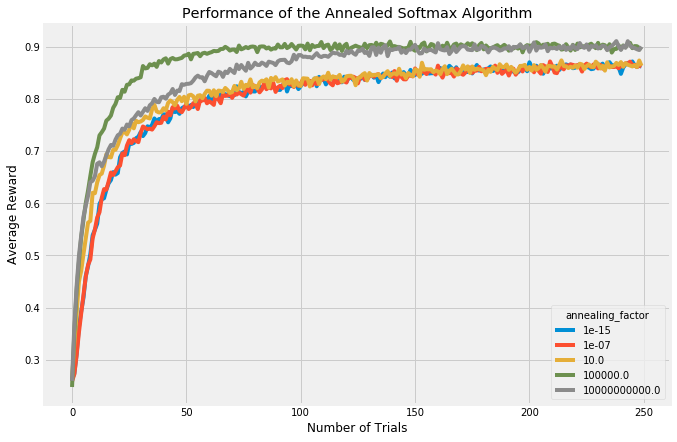

In [23]:
plot_performance(df_ave, 'Annealed Softmax', 'annealing_factor')

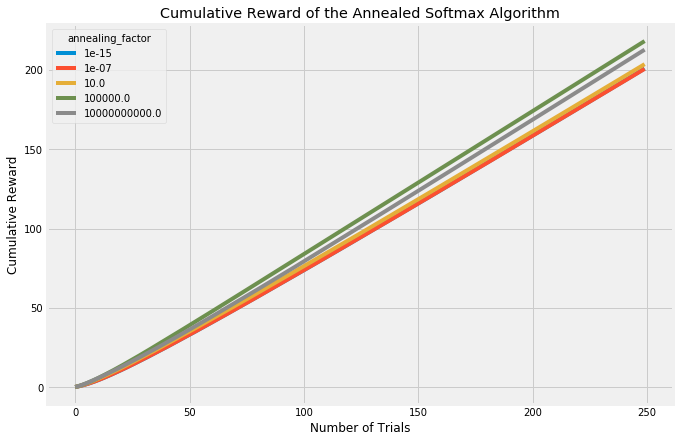

In [24]:
plot_cumulative_reward(df_ave, 'Annealed Softmax', 'annealing_factor')

## Upper Confidence Bound 1

In [25]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)


algorithm = UCB1(n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
df = df.append(new_rows, ignore_index=True, sort=False)

df_ave = summarize_results(df, arms, [])

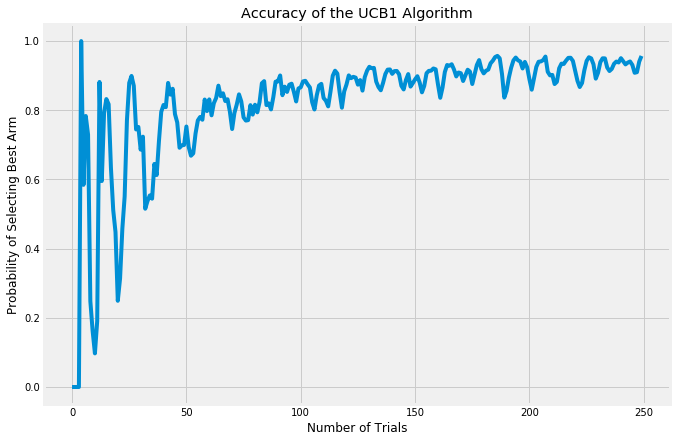

In [26]:
plot_accuracy(df_ave, probabilities, 'UCB1')

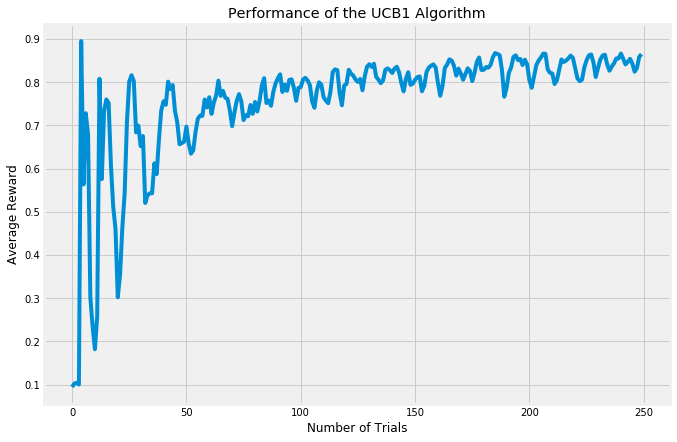

In [27]:
plot_performance(df_ave, 'UCB1')

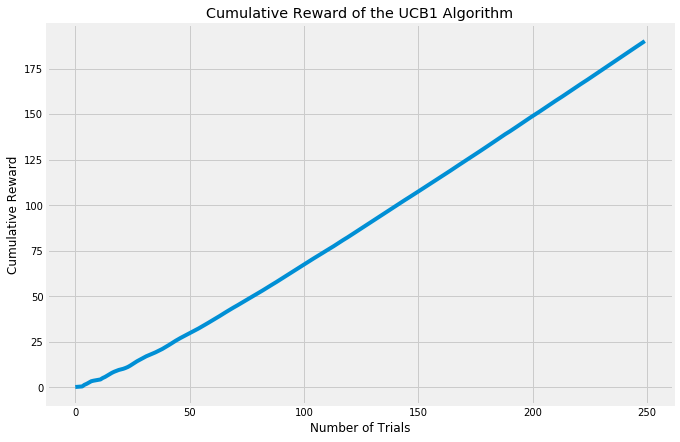

In [28]:
plot_cumulative_reward(df_ave, 'UCB1')

## Upper Confidence Bound 2

In [29]:
columns = ['alpha', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for alpha in [.1, .2, .3, .4, .5]:
    algorithm = UCB2(alpha, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['alpha'] = alpha
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['alpha'])

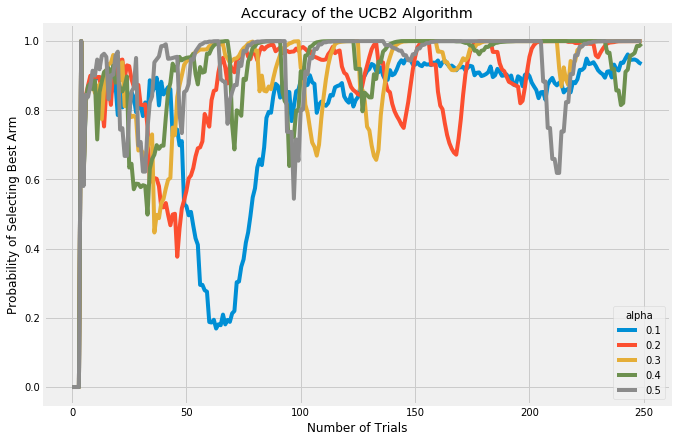

In [30]:
plot_accuracy(df_ave, probabilities, 'UCB2', 'alpha')

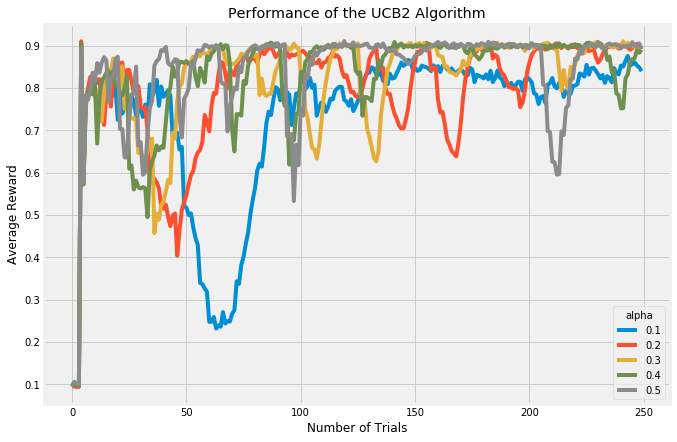

In [31]:
plot_performance(df_ave, 'UCB2', 'alpha')

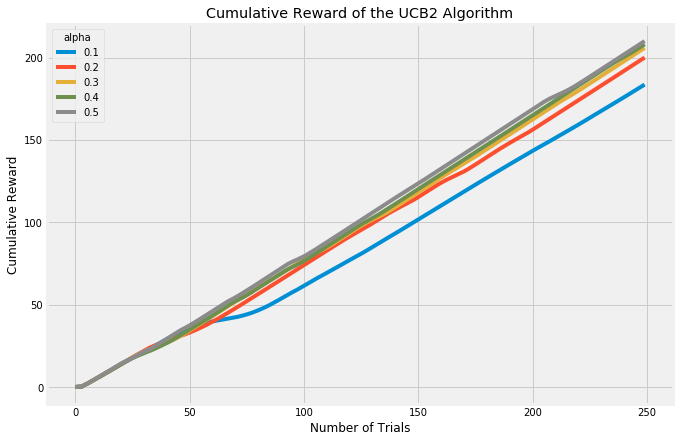

In [32]:
plot_cumulative_reward(df_ave, 'UCB2', 'alpha')

## Thompson Sampling

In [33]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

algorithm = ThompsonSampling(n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
df = df.append(new_rows, ignore_index=True, sort=False)

df_ave = summarize_results(df, arms, [])

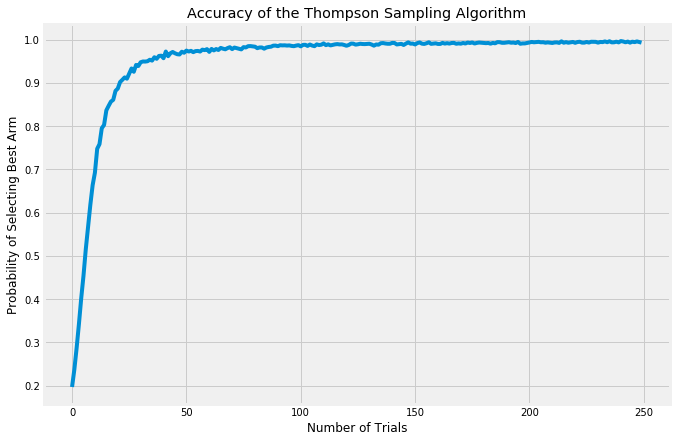

In [34]:
plot_accuracy(df_ave, probabilities, 'Thompson Sampling')

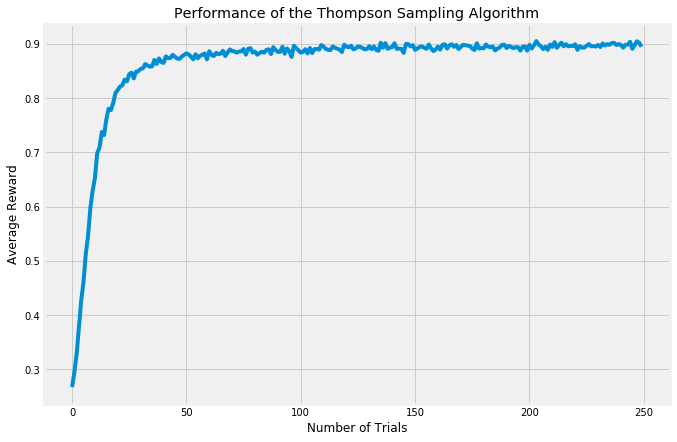

In [35]:
plot_performance(df_ave, 'Thompson Sampling')

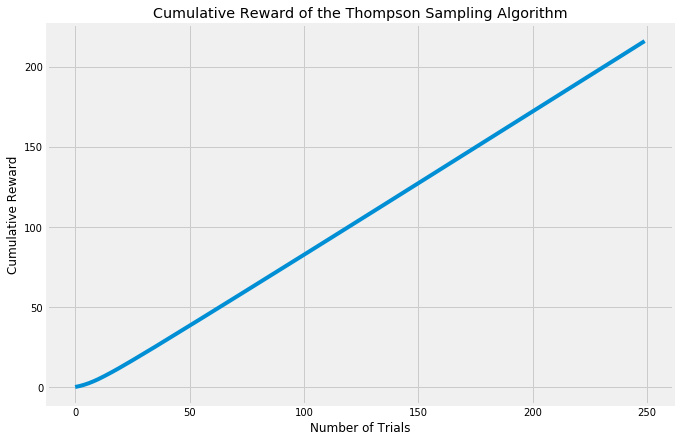

In [36]:
plot_cumulative_reward(df_ave, 'Thompson Sampling')

## EXP3

In [37]:
columns = ['alpha', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

for gamma in [.1, .2, .3, .4, .5]:
    algorithm = EXP3(gamma, n_arms)
    results = run_sim(algorithm, arms, horizon, number_of_simulations)
    new_rows = format_results(results, arms)
    new_rows['gamma'] = gamma
    df = df.append(new_rows, ignore_index=True, sort=False)
df_ave = summarize_results(df, arms, ['gamma'])

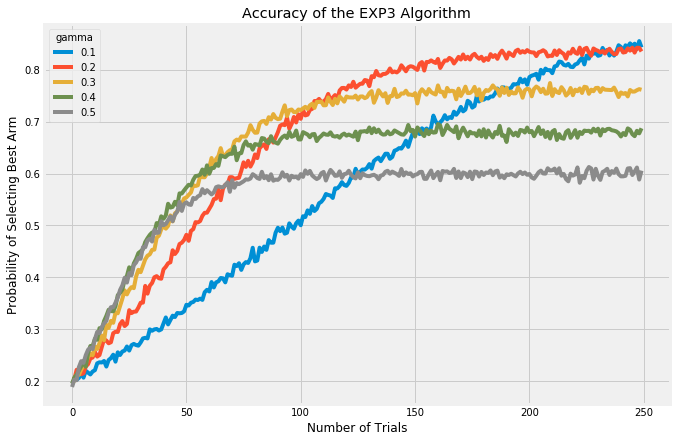

In [38]:
plot_accuracy(df_ave, probabilities, 'EXP3', 'gamma')

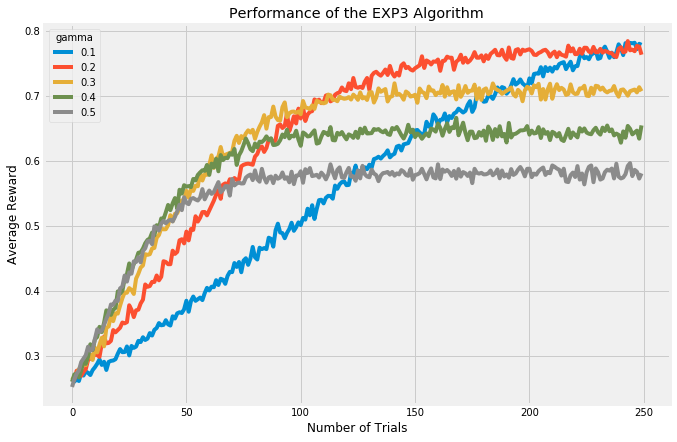

In [39]:
plot_performance(df_ave, 'EXP3', 'gamma')

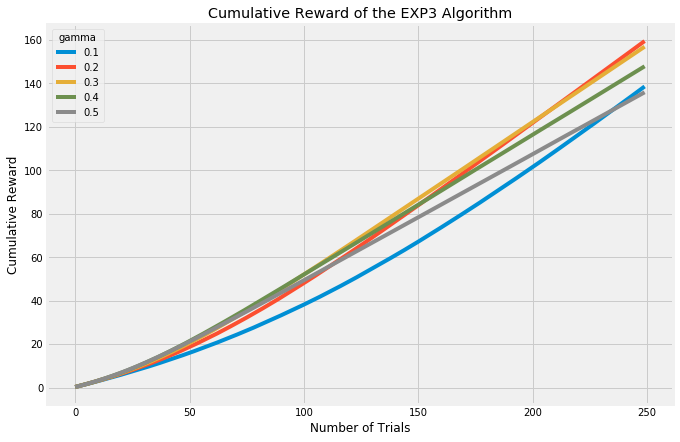

In [40]:
plot_cumulative_reward(df_ave, 'EXP3', 'gamma')

# Comparing Bandits

In [41]:
probabilities = [.1, .1, .1, .1, .9]

In [42]:
n_arms = len(probabilities)
random.shuffle(probabilities)
while probabilities[0] == max(probabilities):
    random.shuffle(probabilities)
arms = [BernoulliTrial(mu) for mu in probabilities]
print('Best arm is {}'.format(np.argmax(probabilities)))

Best arm is 3


In [43]:
horizon = 400
number_of_simulations = 5000

In [44]:
columns = ['temperature', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}'.format(arm) for arm in range(len(arms))])
columns.extend(['arm_{}_cumulative'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns, dtype=float)

# Generate Annealed Epsilon Greedy data
annealing_factor = .0000001
algorithm = EpsilonGreedyAnnealing(n_arms, annealing_factor)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
new_rows['annealing_factor'] = annealing_factor
data = df.copy().append(new_rows, ignore_index=True, sort=False)
epsilon_greedy = summarize_results(data, arms, ['annealing_factor'])

# Generate Annealed Softmax data
annealing_factor = .0000001
algorithm = SoftmaxAnnealing(n_arms, annealing_factor)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
new_rows['annealing_factor'] = annealing_factor
data = df.copy().append(new_rows, ignore_index=True, sort=False)
softmax = summarize_results(data, arms, ['annealing_factor'])

# Generate Upper Confidence Bound 1 data
algorithm = UCB1(n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
data = df.copy().append(new_rows, ignore_index=True, sort=False)
ucb1 = summarize_results(data, arms, [])

# Generate Upper Confidence Bound 2 data
alpha = .5
algorithm = UCB2(alpha, n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
new_rows['alpha'] = alpha
data = df.copy().append(new_rows, ignore_index=True, sort=False)
ucb2 = summarize_results(data, arms, ['alpha'])

# Generate Thompson Sampling data
algorithm = ThompsonSampling(n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
data = df.copy().append(new_rows, ignore_index=True, sort=False)
thompson = summarize_results(data, arms, [])

# Generate EXP3 data
gamma = .2
algorithm = EXP3(gamma, n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
new_rows = format_results(results, arms)
new_rows['gamma'] = gamma
data = df.copy().append(new_rows, ignore_index=True, sort=False)
exp3 = summarize_results(data, arms, ['gamma'])

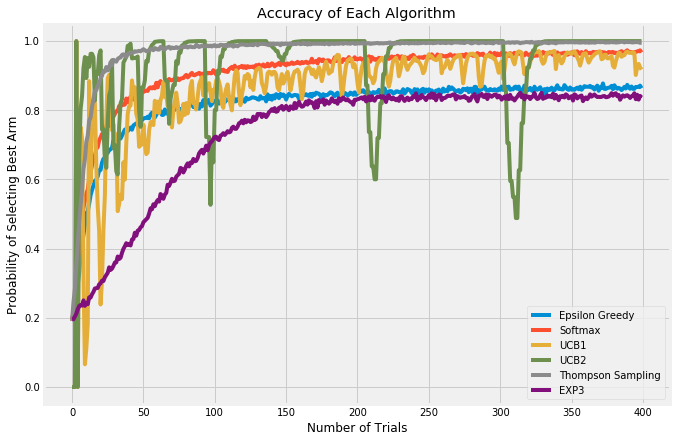

In [45]:
plt.figure(figsize=(10, 7))
best_arm = np.argmax(probabilities)
plt.plot(epsilon_greedy['trial'], epsilon_greedy['arm_{}'.format(best_arm)], label='Epsilon Greedy')
plt.plot(softmax['trial'], softmax['arm_{}'.format(best_arm)], label='Softmax')
plt.plot(ucb1['trial'], ucb1['arm_{}'.format(best_arm)], label='UCB1')
plt.plot(ucb2['trial'], ucb2['arm_{}'.format(best_arm)], label='UCB2')
plt.plot(thompson['trial'], thompson['arm_{}'.format(best_arm)], label='Thompson Sampling')
plt.plot(exp3['trial'], exp3['arm_{}'.format(best_arm)], label='EXP3')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Selecting Best Arm')
plt.title('Accuracy of Each Algorithm')
plt.legend()
plt.show()

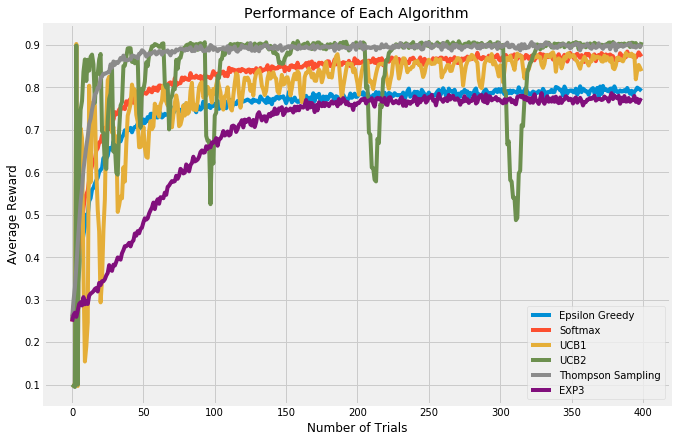

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(epsilon_greedy['trial'], epsilon_greedy['reward'], label='Epsilon Greedy')
plt.plot(softmax['trial'], softmax['reward'], label='Softmax')
plt.plot(ucb1['trial'], ucb1['reward'], label='UCB1')
plt.plot(ucb2['trial'], ucb2['reward'], label='UCB2')
plt.plot(thompson['trial'], thompson['reward'], label='Thompson Sampling')
plt.plot(exp3['trial'], exp3['reward'], label='EXP3')
plt.xlabel('Number of Trials')
plt.ylabel('Average Reward')
plt.title('Performance of Each Algorithm')
plt.legend()
plt.show()

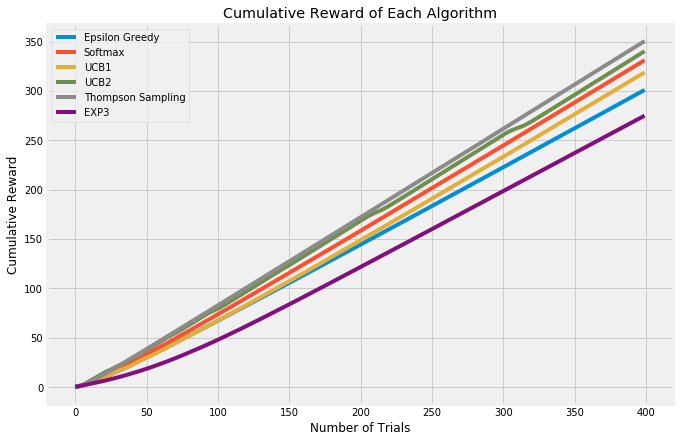

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(epsilon_greedy['trial'], epsilon_greedy['cumulative_reward'], label='Epsilon Greedy')
plt.plot(softmax['trial'], softmax['cumulative_reward'], label='Softmax')
plt.plot(ucb1['trial'], ucb1['cumulative_reward'], label='UCB1')
plt.plot(ucb2['trial'], ucb2['cumulative_reward'], label='UCB2')
plt.plot(thompson['trial'], thompson['cumulative_reward'], label='Thompson Sampling')
plt.plot(exp3['trial'], exp3['cumulative_reward'], label='EXP3')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward of Each Algorithm')
plt.legend()
plt.show()

# Run an experiment

In [48]:
probabilities = [.1, .5, .6, .25, .9]
probabilities = [.01, .009, .0105, .011, .015]
# probabilities = [.0001, .00008, .000085, .0001001, .00011]

In [49]:
n_arms = len(probabilities)
random.shuffle(probabilities)
while probabilities[0] == max(probabilities):
    random.shuffle(probabilities)
arms = [BernoulliTrial(mu) for mu in probabilities]
print('Best arm is {}'.format(np.argmax(probabilities)))

Best arm is 3


In [50]:
horizon = 1000000
number_of_simulations = 1
confidence_level = .95

In [51]:
epsilon = .5
algorithm = EpsilonGreedy(epsilon, n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
df = format_results(results, arms)
arm_results = create_arm_results(df, arms, confidence_level)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


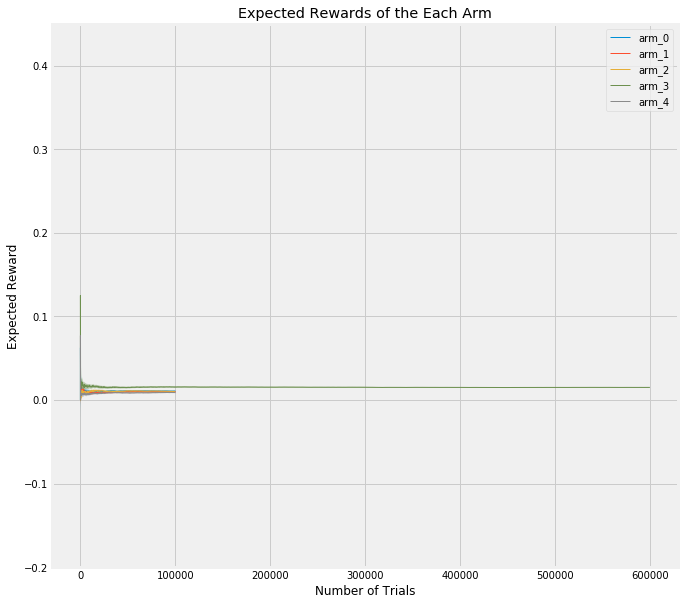

In [52]:
plot_expected_reward(df, arms, arm_results)

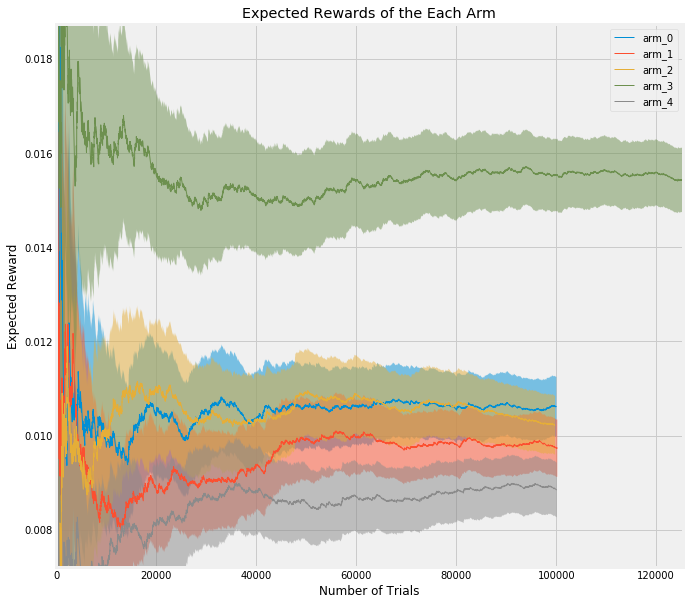

In [53]:
plot_expected_reward(df,
                     arms,
                     arm_results,
                     xlim=df['chosen_arm'].value_counts().to_list()[1]*1.25,
                     ylim=(min(probabilities)/1.25,
                           max(probabilities)*1.25))

In [54]:
algorithm = ThompsonSampling(n_arms)
results = run_sim(algorithm, arms, horizon, number_of_simulations)
df = format_results(results, arms)
arm_results = create_arm_results(df, arms, confidence_level)

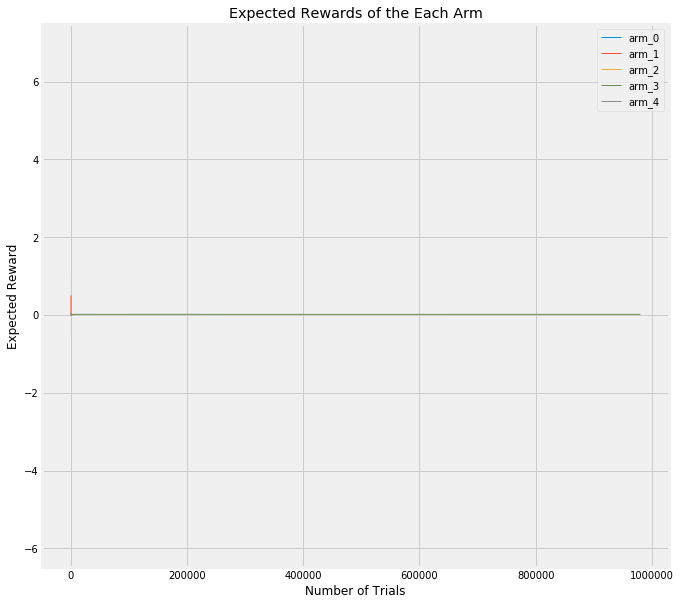

In [55]:
plot_expected_reward(df, arms, arm_results)

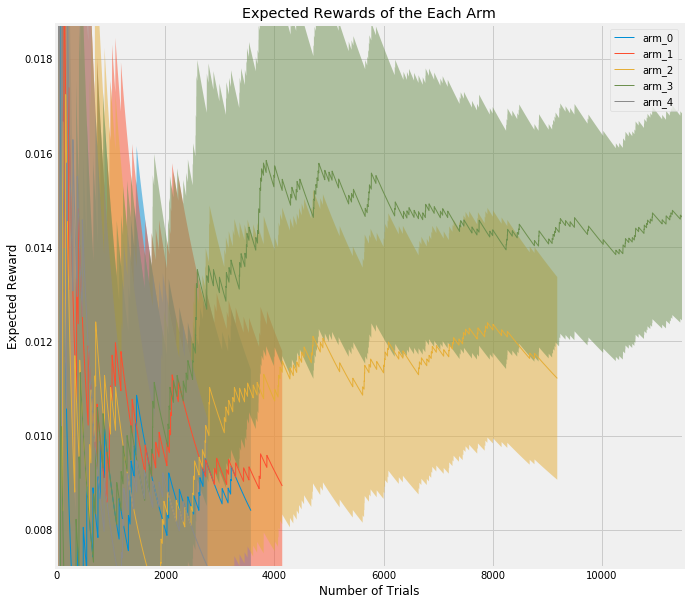

In [56]:
plot_expected_reward(df,
                     arms,
                     arm_results,
                     xlim=df['chosen_arm'].value_counts().to_list()[1]*1.25,
                     ylim=(min(probabilities)/1.25,
                           max(probabilities)*1.25))

# Traditional A/B test
Does treatment B outperform by 5% the current state, A (with historically known reward), at the 95% confidence level?

In [57]:
prob_a = .01  # In reality, true value unknown. Needed for simulation.
prob_b = .0105  # In reality, true value unknown. Needed for simulation.
alpha = .95

### Use Power Analysis to determine required sample size

In [58]:
power_required = .8

In [59]:
trial_a = BernoulliTrial(prob_a)
historical_data = [trial_a.draw() for idx in range(10000000)]
st_dev = np.std(historical_data)

In [60]:
z_alpha = stats.norm.ppf((1 - alpha) / 2)
z_beta = stats.norm.ppf(power_required)

In [61]:
sample_size = 2 * st_dev ** 2 * (np.abs(z_alpha) + np.abs(z_beta)) ** 2 / (prob_b - np.mean(historical_data)) ** 2
sample_size

737677.424365908

### Simulate A/B test

In [62]:
from math import log10, ceil, floor

def round_up(x, sigfigs=1):
    exponent = floor(log10(x))
    mantissa = x/10**exponent
    mantissa = ceil(mantissa * 10**(sigfigs-1)) / 10**(sigfigs-1)
    return mantissa * 10**exponent

In [63]:
horizon = int(round_up(sample_size / 2))  # round up necessary sample size

In [64]:
trial_b = BernoulliTrial(prob_b)
results_a = np.array([trial_a.draw() for idx in range(horizon)])
results_b = np.array([trial_b.draw() for idx in range(horizon)])

In [65]:
stat, p = stats.ttest_ind(results_a, results_b)
print('t={:.3f}, p={:.3f}'.format(stat, p))

t=-3.950, p=0.000


In [66]:
# interpret via p-value
if p > 1-alpha:
    print('The p-value is not less than the confidence level. Accept null hypothesis that the means are equal.')
else:
    print('The p-value is less than the confidence level. Reject the null hypothesis that the means are equal.')

The p-value is less than the confidence level. Reject the null hypothesis that the means are equal.
